<a href="https://colab.research.google.com/github/pawara101/tensor-flow/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions froa regression: Presdecting a numerical value  based on some combinations of variales.

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.15.0


## Creating data to view and fit

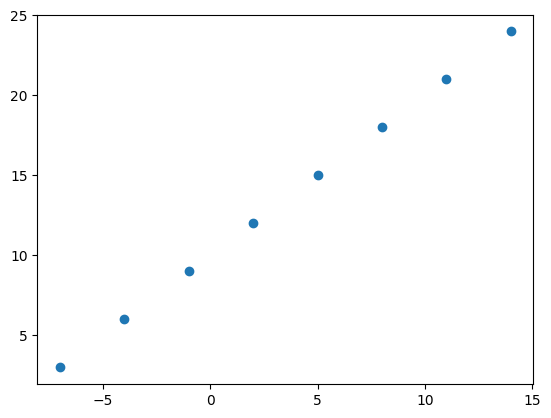

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

## Creating labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

## Visualize it
plt.scatter(X,y)

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [4]:
## create a demo tensor
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant(9334000)

house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(), dtype=int32, numpy=9334000>)

In [5]:
house_info.shape

TensorShape([3])

In [6]:
X[0],y[0]

(-7.0, 3.0)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape,output_shape

((), ())

In [8]:
## Trun our Numpy array into tensors
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [9]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape,output_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling with TensorFlow
1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss funstion and optimizer and evaluation metrics
3. **Fitting a model** - Letting the model to try

In [10]:
## Set Random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,## Loss function MAE
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])


# 3. Fit the model
# model.fit(X,y, epochs=5)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) # for above tf > 2.7.0

Epoch 1/5
1/1 [==============================] - 0s 463ms/step - loss: 13.1638 - mae: 13.1638
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 13.0313 - mae: 13.0313
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 12.8988 - mae: 12.8988
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 12.7663 - mae: 12.7663
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 12.6338 - mae: 12.6338


In [11]:
tf.expand_dims(X, axis=-1),y

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [12]:
## Checkout X and y
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [13]:
## Make a prediction
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 108ms/step


array([[4.6582007]], dtype=float32)

## Improving our Model
Can improve the model by altering the steps we took to create a model.
  1. **Creating a model** - Here we might add more layers, add more hidden units, change activation function of each layer.
  2. **Compiling a model** - Change the optimizer or perhaps the learning rate optmization function.
  3. **Fitting a model** - Here fit a model for more *epochs* or on more data

  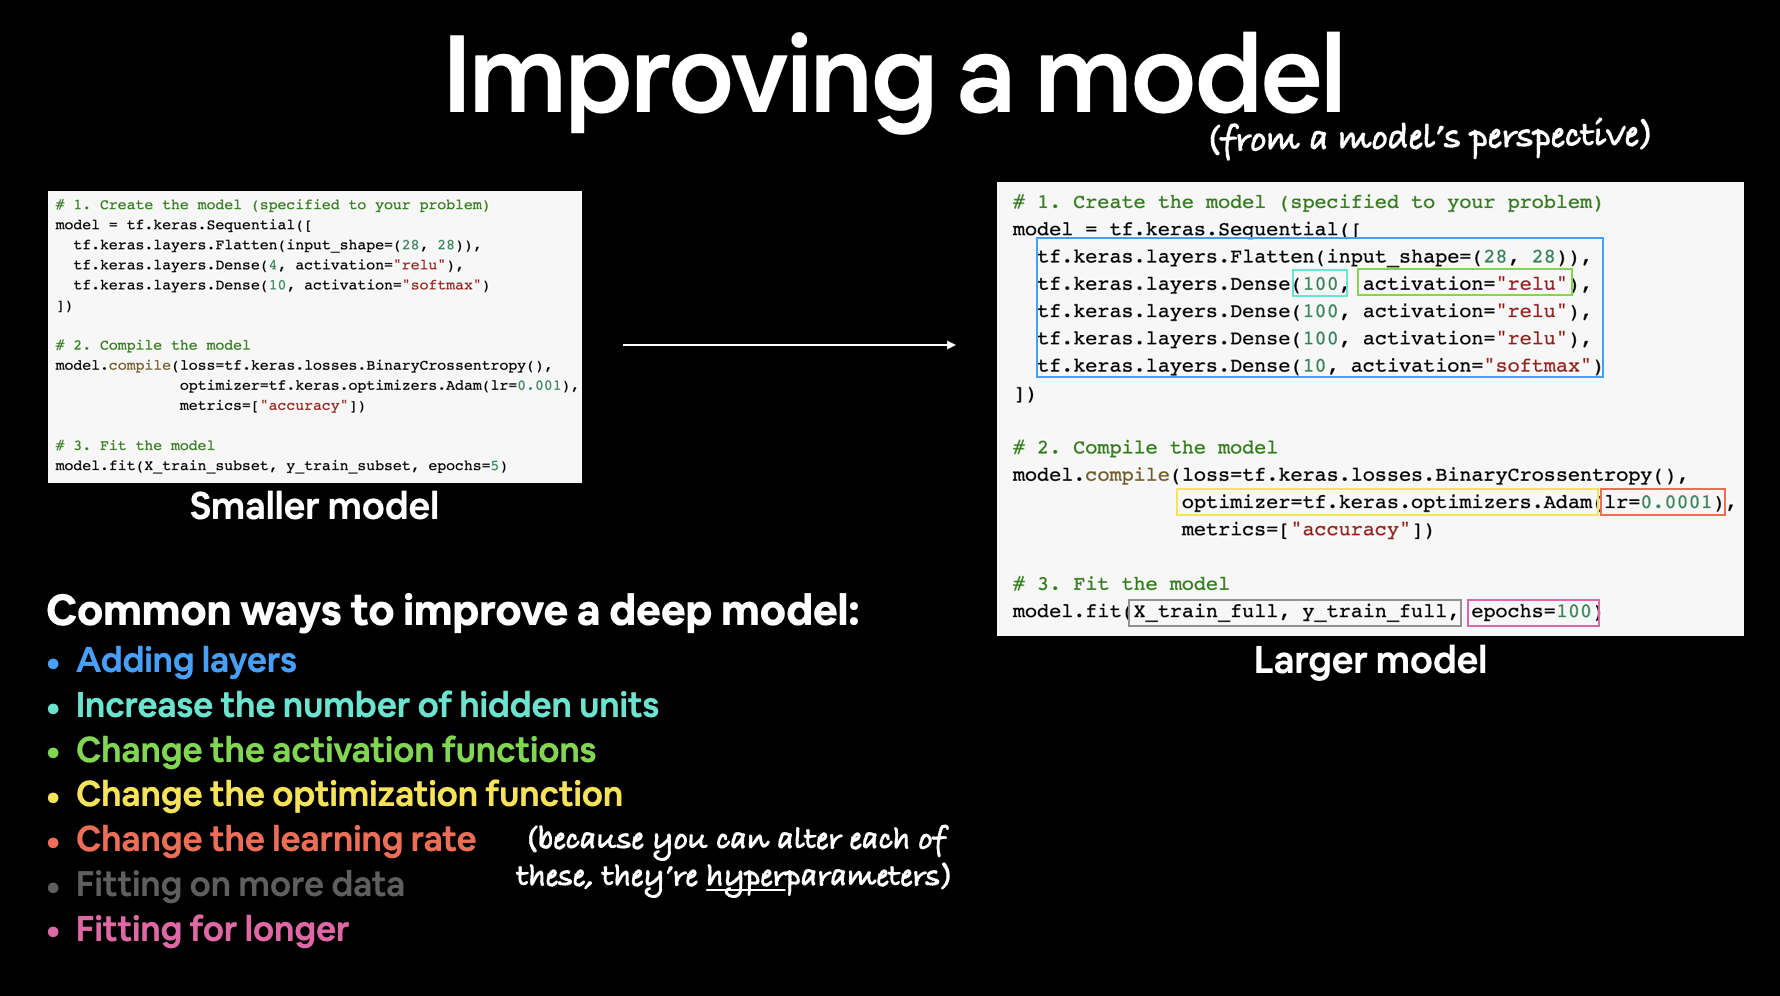


In [14]:
## Rebuild the model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])


# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model for longer time
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # for above tf > 2.7.0

Epoch 1/100
1/1 [==============================] - 0s 337ms/step - loss: 14.6402 - mae: 14.6402
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 14.5077 - mae: 14.5077
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 14.3752 - mae: 14.3752
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 14.2427 - mae: 14.2427
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 14.1102 - mae: 14.1102
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 13.9777 - mae: 13.9777
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 13.8452 - mae: 13.8452
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 13.7127 - mae: 13.7127
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 13.5802 - mae: 13.5802
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 13.4477 - mae: 13.4477
Epoch 11/100
1/1 [==============================] 

In [15]:
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [16]:
## Make a prediction
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 92ms/step


array([[29.867035]], dtype=float32)

In [17]:
## Let's see we can make another change to the model

# 1. Create the model with an extra hidden layer with 100 hidden units
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(1)
])


# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3. Fit the model for longer time
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # for above tf > 2.7.0

Epoch 1/100
1/1 [==============================] - 1s 965ms/step - loss: 13.9428 - mae: 13.9428
Epoch 2/100
1/1 [==============================] - 0s 20ms/step - loss: 13.2249 - mae: 13.2249
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 12.5075 - mae: 12.5075
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 11.7898 - mae: 11.7898
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 11.0699 - mae: 11.0699
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 10.3454 - mae: 10.3454
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 9.6136 - mae: 9.6136
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 8.8716 - mae: 8.8716
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 8.1159 - mae: 8.1159
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 7.3432 - mae: 7.3432
Epoch 11/100
1/1 [==============================] - 0s 1

In [18]:
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [19]:
## Make a prediction
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 184ms/step


array([[27.311478]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you'll go throygh when building neural network is:


```
Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...
```

For Evaluation try with Visulaization
 * The data -
 * The model itself
 * The trainning of a model
 * Predictions of the model



In [20]:
## Make a Big data set
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [21]:
## Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

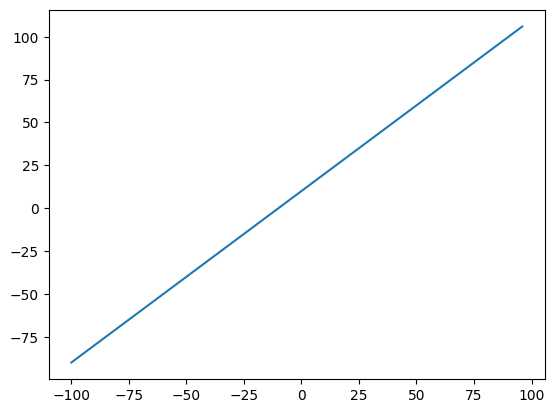

In [22]:
## Visualize the data
plt.plot(X,y)

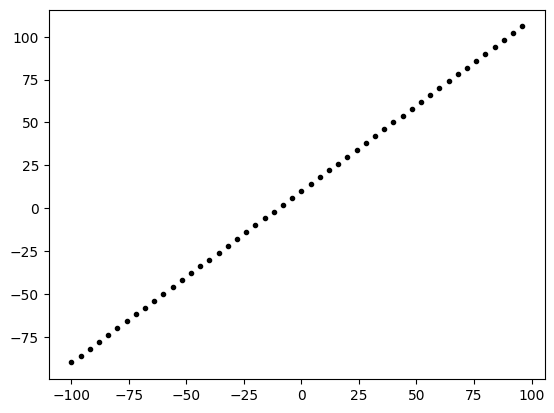

In [23]:
plt.scatter(X,y,marker='.',c='k')

### The 3 sets...

* Trainning set : model learns from this data (typically 70-80%)
* Validation set : model is yuned on this data (typically 10-15%)
* Test set : model get evaluated on this data (typically 10-15%)

In [24]:
# Check the length of how many samples we have
len(X)

50

In [25]:
# Split data into train and test sets
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

### Visulasing the data

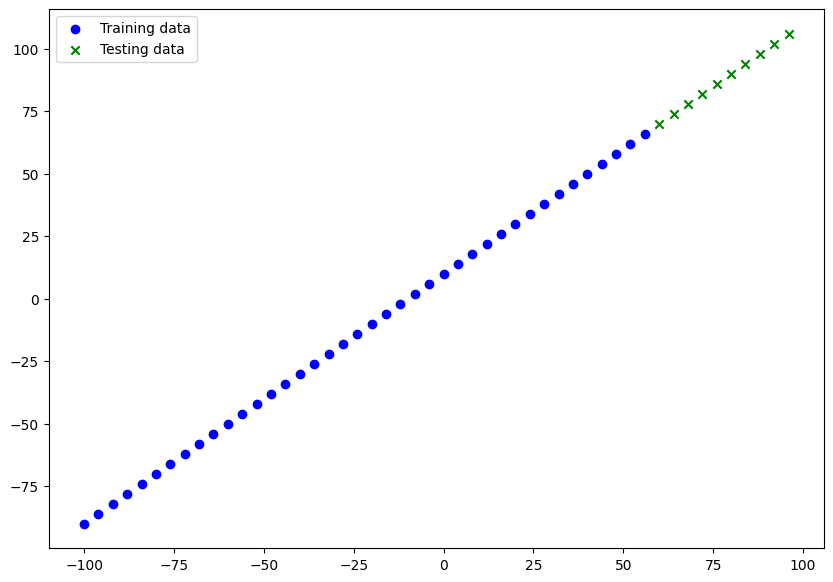

In [26]:
plt.figure(figsize=(10,7))

## Train data
plt.scatter(X_train,y_train,c="b",label='Training data')

## Test Data
plt.scatter(X_test,y_test,c="g",marker='x',label='Testing data')
plt.legend()

In [27]:
## Lets build a neural network
## 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

## 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"]
              )

## 3. Fit the model
# model.fit(X_train, y_train, epochs=100)

In [28]:
tf.random.set_seed(42)

## 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1])
])

## 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])


### Visualize the model

In [29]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
Total params: 20 (80.00 Byte)
Trainable params: 20 (80.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total number of parameters in the model
* Trainable parameters - these are the parameters,the model can update as ot trains.
* Non-trainable params - these parameters are not updated during trainning.

In [30]:
# Let's fit the model
model.fit(X_train,y_train,epochs=100,verbose=0)

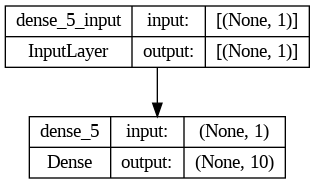

In [31]:
from tensorflow.keras.utils import plot_model

plot_model(model=model,show_shapes=True)

In [32]:
### Similarly


## 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1],name="Input_layer"),
    tf.keras.layers.Dense(1,name="output_layer")
],name = "TEST_MODEL1")

## 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

In [33]:
model.summary()

Model: "TEST_MODEL1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
model.fit(X_train, y_train, epochs=100) # verbose controls how much gets output

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 27.5835 - mae: 27.5835
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 24.9537 - mae: 24.9537
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 24.5716 - mae: 24.5716
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 14.8749 - mae: 14.8749
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 17.9825 - mae: 17.9825
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 13.4184 - mae: 13.4184
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 12.5910 - mae: 12.5910
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 11.0109 - mae: 11.0109
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 39.5003 - mae: 39.5003
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 27.0209 - mae: 27.0209
Epoch 11/100
2/2 [==============================] - 0s 9ms/

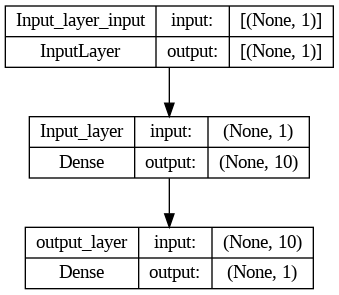

In [35]:
plot_model(model=model,show_shapes=True)

### Visualizing model's predictions

To visualise predictions, it is a good idea to plot them against the griund truth labels.

Often you will see this in form of `y_test` `y_pred`

In [36]:
## Make some predictions

y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 52ms/step


array([[ 78.28275 ],
       [ 83.3836  ],
       [ 88.48444 ],
       [ 93.585304],
       [ 98.68615 ],
       [103.787   ],
       [108.88785 ],
       [113.98871 ],
       [119.089554],
       [124.1904  ]], dtype=float32)

In [37]:
 ## Lets create the plotting function
 def plot_predictions(train_data = X_train,
                      train_label = y_train,
                      test_data = X_test,
                      test_label = y_test,
                      predictions = y_pred):

    plt.figure(figsize=(10,7))

    ## Train data
    plt.scatter(train_data,train_label,c="b",label='Training data')

    ## Test Data
    plt.scatter(test_data,test_label,c="g",marker='x',label='Testing data')

    ## plot the preds
    plt.scatter(test_data,predictions,c='r',label="Predictions")

    ## Show the legends
    plt.legend();

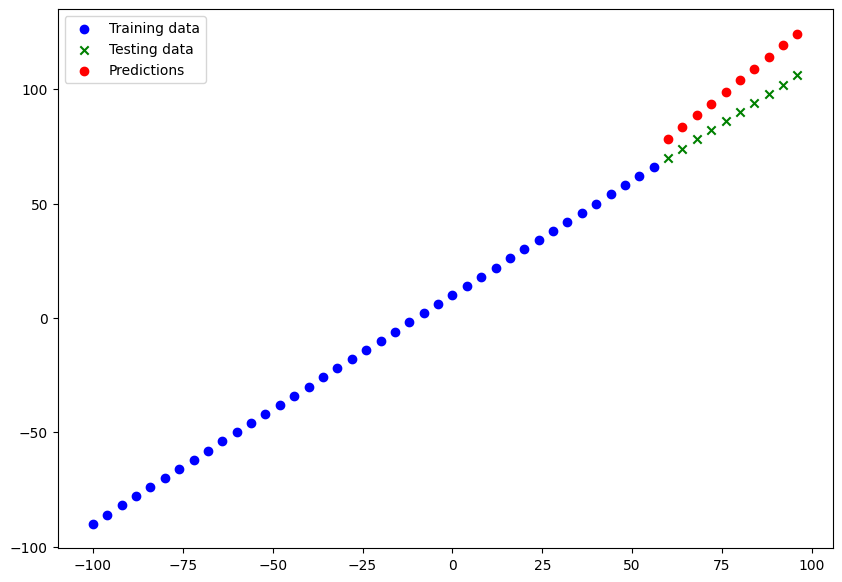

In [38]:
plot_predictions()

### Evaluate our model predictions with regression evaluation metrics

Depending on the problem you are working on, there will be different evaluation metrics to evaluate your model's performance.

* MAE - mean absolute error : `tf.keras.losses.MAE()` or `tf.metrics.mean_absolute_error()` ▶ As a great starter metric for any regression problem.
* MSE - mean square error : `tf.keras.losses.MSE()` or `tf.metrics.mean_square_error()` ▶ When larger errors are more significant than smaller errors.

In [39]:
## Evaluate the model on the test
model.evaluate(X_test, y_test) ## Gives loss and evaluation metric

1/1 [==============================] - 0s 184ms/step - loss: 13.2366 - mae: 13.2366


[13.23657512664795, 13.23657512664795]

In [40]:
[loss,metric]=model.evaluate(X_test, y_test)
loss,metric

1/1 [==============================] - 0s 24ms/step - loss: 13.2366 - mae: 13.2366


(13.23657512664795, 13.23657512664795)

In [41]:
## Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_test,y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([12.286899, 10.52328 , 10.      , 10.717061, 12.811689, 16.229603,
       20.887848, 25.988708, 31.089554, 36.1904  ], dtype=float32)>

In [42]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [43]:
y_pred

array([[ 78.28275 ],
       [ 83.3836  ],
       [ 88.48444 ],
       [ 93.585304],
       [ 98.68615 ],
       [103.787   ],
       [108.88785 ],
       [113.98871 ],
       [119.089554],
       [124.1904  ]], dtype=float32)

In [44]:
## Dimentions are not matched
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 78.28275 ],
       [ 83.3836  ],
       [ 88.48444 ],
       [ 93.585304],
       [ 98.68615 ],
       [103.787   ],
       [108.88785 ],
       [113.98871 ],
       [119.089554],
       [124.1904  ]], dtype=float32)>

In [45]:
## remove extra 1 dimension
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 78.28275 ,  83.3836  ,  88.48444 ,  93.585304,  98.68615 ,
       103.787   , 108.88785 , 113.98871 , 119.089554, 124.1904  ],
      dtype=float32)>

In [46]:
## Calculate the MAE
mae  = tf.metrics.mean_absolute_error(y_test,tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=13.236575>

In [47]:
## Calculate the MSE
mse = tf.metrics.mean_squared_error(y_test,tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=185.2049>

In [48]:
def mae(y_true,y_pred):
  return tf.metrics.mean_absolute_error(y_true,tf.squeeze(y_pred))

def mse(y_true,y_pred):
  return tf.metrics.mean_squared_error(y_true,tf.squeeze(y_pred))

### Running experiments to imporve the model

```
Build a model > fit > evaluate > tweak > fit > evaluate > tweak > fit > evaluate
```

1. Get more data - get more examples for your model to train
2. Make your model larger.
3. Train for longer - give your model to more chance to train


Let's do 3 modelling experiments:

1. `model_1` -  same as original model, 1 layer , trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs


**Build** `model_1`

In [49]:
## set random seed
tf.random.set_seed(42)

## Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

## Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

model_1.fit(tf.expand_dims(X_train,axis=1),y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 107.8387 - mae: 107.8387
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 72.3832 - mae: 72.3832
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 34.8426 - mae: 34.8426
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 8.8066 - mae: 8.8066
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 11.0339 - mae: 11.0339
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1974 - mae: 10.1974
Epoch 7/100
2/2 [==============================] - 0s 15ms/step - loss: 9.2160 - mae: 9.2160
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 9.1591 - mae: 9.1591
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 11.7618 - mae: 11.7618
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 13.6778 - mae: 13.6778
Epoch 11/100
2/2 [==============================] - 0s 6ms/st

1/1 [==============================] - 0s 49ms/step


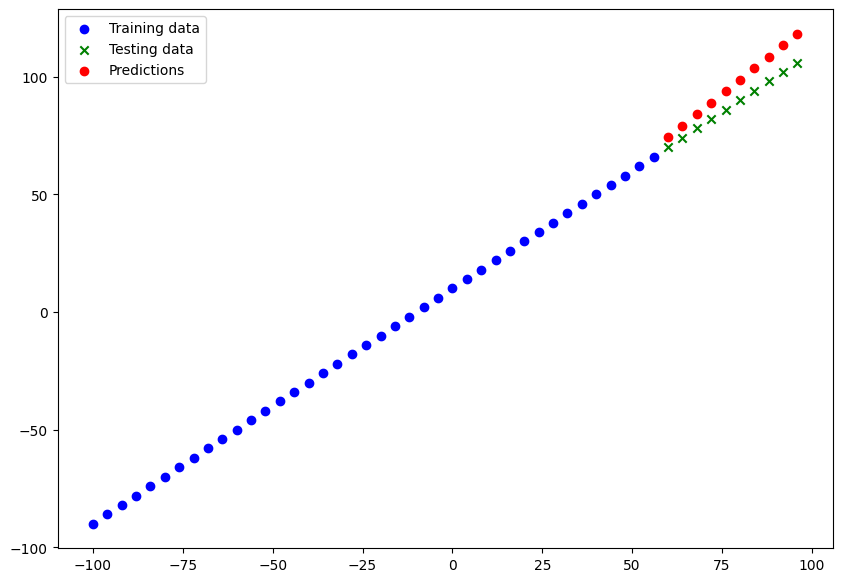

In [50]:
## make a plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [51]:
## Calculate model_1 evaluation metrics
mae_1 = mae(y_test,y_preds_1)
mse_1 = mse(y_test,y_preds_1)
mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=8.314202>,
 <tf.Tensor: shape=(), dtype=float32, numpy=75.42329>)

**Build `model_2`**
* 2 Dense layers, trained for 100 epochs.

In [64]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1) # add a second layer
])

## Compile
model_2.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_2.fit(tf.expand_dims(X_train,axis=1),y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 53.3468 - mae: 53.3468
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 11.4504 - mae: 11.4504
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 29.7290 - mae: 29.7290
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 14.7843 - mae: 14.7843
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 17.5995 - mae: 17.5995
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 10.2791 - mae: 10.2791
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 11.3041 - mae: 11.3041
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 11.1931 - mae: 11.1931
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 41.4265 - mae: 41.4265
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 28.6982 - mae: 28.6982
Epoch 11/100
2/2 [==============================] - 0s 8ms/

1/1 [==============================] - 0s 61ms/step


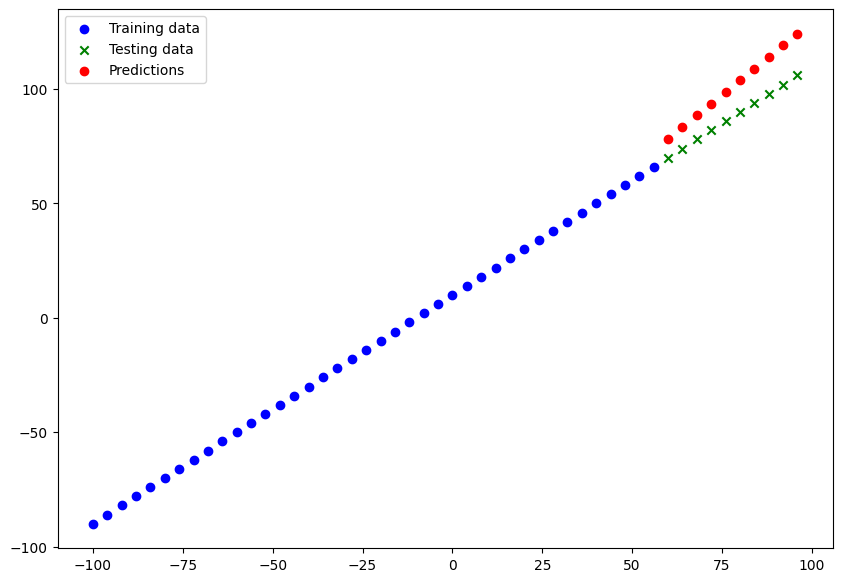

In [65]:
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [66]:
## Calculate the evaluation metrics on model_2
mae_2 = mae(y_test,y_preds_2)
mse_2 = mse(y_test,y_preds_2)
mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=13.223755>,
 <tf.Tensor: shape=(), dtype=float32, numpy=184.84242>)

**Build `model_3`**

* 2 layers, trained for 500 epochs

In [67]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1) # add a second layer
])

## Compile
model_3.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_3.fit(tf.expand_dims(X_train,axis=1),y_train,epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 10ms/step - loss: 52.4580 - mae: 52.4580
Epoch 2/500
2/2 [==============================] - 0s 7ms/step - loss: 14.6391 - mae: 14.6391
Epoch 3/500
2/2 [==============================] - 0s 6ms/step - loss: 21.2207 - mae: 21.2207
Epoch 4/500
2/2 [==============================] - 0s 6ms/step - loss: 12.3468 - mae: 12.3468
Epoch 5/500
2/2 [==============================] - 0s 7ms/step - loss: 13.5044 - mae: 13.5044
Epoch 6/500
2/2 [==============================] - 0s 6ms/step - loss: 10.8735 - mae: 10.8735
Epoch 7/500
2/2 [==============================] - 0s 7ms/step - loss: 11.8459 - mae: 11.8459
Epoch 8/500
2/2 [==============================] - 0s 7ms/step - loss: 10.7985 - mae: 10.7985
Epoch 9/500
2/2 [==============================] - 0s 7ms/step - loss: 36.7841 - mae: 36.7841
Epoch 10/500
2/2 [==============================] - 0s 7ms/step - loss: 24.5624 - mae: 24.5624
Epoch 11/500
2/2 [==============================] - 0s 7ms

1/1 [==============================] - 0s 21ms/step


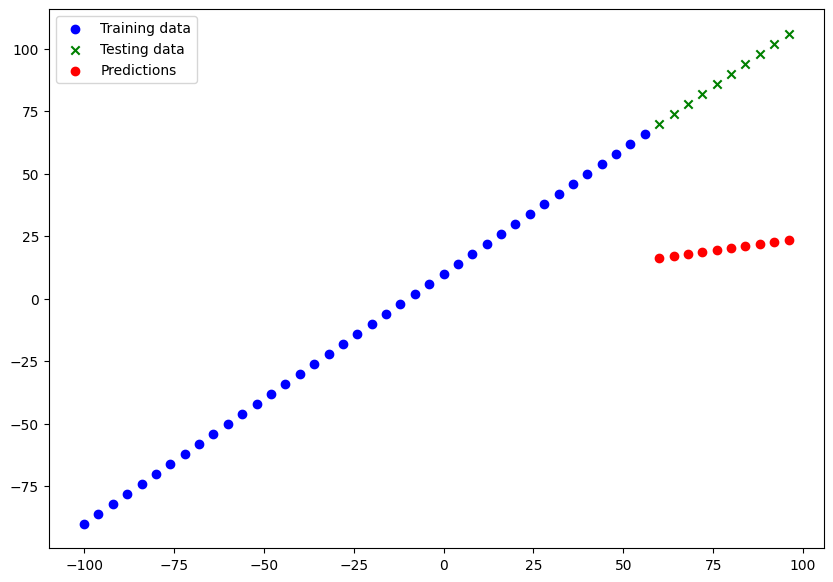

In [69]:
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [70]:
model_3.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 10)                20        
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [71]:
## Calculate the evaluation metrics on model_3
mae_3 = mae(y_test,y_preds_3)
mse_3 = mse(y_test,y_preds_3)
mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.89344>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4693.96>)

🔑 **Note :** Start with small model and then increase the complexity of the model

## Compare the results

In [72]:
## Let's compare the model's resu;ts ysing the pandas DataFrame
import pandas as pd
model_results = [
    ["model_1",mae_1.numpy(),mse_1.numpy()],
    ["model_2",mae_2.numpy(),mse_2.numpy()],
    ["model_3",mae_3.numpy(),mse_3.numpy()]
]
all_results  = pd.DataFrame(model_results,columns=["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,8.314202,75.423286
1,model_2,13.223755,184.842422
2,model_3,67.893440,4693.959961


In [73]:
model_2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 10)                20        
                                                                 
 dense_12 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Seems the `model_2` or `model_2` is better

## Tracking the experiments

* TensorBoard : https://www.tensorflow.org/tensorboard
* Weights & Biases : https://wandb.ai/site

## Saving our model

Saving our model allows us to use them outside the Google Colab.

There are 2 main formats
- The `SavedModel` format
- The `HDF5` format

In [74]:
## Save model using SavedModel
model_2.save("model_2_SaveModel")

In [75]:
## Save model using HDF5
model_2.save("model_2_HDF5.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Loading in asaved model

In [76]:
## Load in the Savedmodel fromat
loaded_Savedmodel_format  = tf.keras.models.load_model("/content/model_2_SaveModel")
loaded_Savedmodel_format.summary() ## same as Model 2

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 10)                20        
                                                                 
 dense_12 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [77]:
## Compare loaded_Savedmodel_format
model_2_preds = model_2.predict(X_test)
loaded_Savedmodel_format_preds = loaded_Savedmodel_format.predict(X_test)
model_2_preds == loaded_Savedmodel_format_preds

1/1 [==============================] - 0s 88ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [78]:
model_2_preds.squeeze()

array([ 78.27568 ,  83.37526 ,  88.47482 ,  93.574394,  98.67397 ,
       103.77354 , 108.873116, 113.97269 , 119.07225 , 124.17183 ],
      dtype=float32)

In [79]:
loaded_Savedmodel_format_preds.squeeze()

array([ 78.27568 ,  83.37526 ,  88.47482 ,  93.574394,  98.67397 ,
       103.77354 , 108.873116, 113.97269 , 119.07225 , 124.17183 ],
      dtype=float32)

In [80]:
## Load in model using H5 model format
loaded_h5_model = tf.keras.models.load_model("/content/model_2_HDF5.h5")
loaded_h5_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 10)                20        
                                                                 
 dense_12 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [83]:
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
loaded_h5_model_preds == model_2_preds

1/1 [==============================] - 0s 20ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model from Colab

In [85]:
from google.colab import files
files.download("/content/model_2_HDF5.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>